In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\KSSEEB\OneDrive\Documents\Python certisured\EDA\used_car_eda\used_cars_data.csv')

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [5]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=['S.No.','New_Price'], axis= 1, inplace = True)

In [10]:
df.dropna(subset=['Price','Seats','Mileage'], inplace=True)

In [11]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [12]:
df[['Power (Numeric)', 'unit']] = df['Power'].str.split(' ',expand = True)
df['Power (Numeric)'].replace({'null':'0'}, inplace=True)
df['Power (Numeric)'] = df['Power (Numeric)'].astype('float')

In [13]:
df[['Engine (Numeric)','unit']] = df['Engine'].str.split(' ',expand= True)
df['Engine (Numeric)'] = df['Engine (Numeric)'].astype('float')

In [14]:
df[['Mileage (Numeric)','unit']] = df['Engine'].str.split(' ',expand= True)
df['Mileage (Numeric)'] = df['Mileage (Numeric)'].astype('float')

In [15]:
df.drop('unit',axis=1,inplace= True)

In [16]:
df['Car_Age']= date.today().year-df['Year']

In [17]:
df['Brand'] = df.Name.str.split().str.get(0)
df['Model'] = df.Name.str.split().str.get(1) + ' ' +  df.Name.str.split().str.get(2)

In [18]:
df[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6
2,Honda Jazz V,Honda,Jazz V
3,Maruti Ertiga VDI,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New
...,...,...,...
6014,Maruti Swift VDI,Maruti,Swift VDI
6015,Hyundai Xcent 1.1 CRDi S,Hyundai,Xcent 1.1
6016,Mahindra Xylo D4 BSIV,Mahindra,Xylo D4
6017,Maruti Wagon R VXI,Maruti,Wagon R


In [36]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force',
       'Bentley', 'Lamborghini'], dtype=object)

In [19]:
searchfor = ['Isuzu','ISUZU','Mini','Land']
'|'.join(searchfor)

'Isuzu|ISUZU|Mini|Land'

In [20]:
searchfor = ['Isuzu','ISUZU','Mini','Land']
df[df.Brand.str.contains('|'.join(searchfor))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (Numeric),Engine (Numeric),Mileage (Numeric),Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,27.00,187.70,2179.0,2179.0,10,Land,Rover Range
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,115.00,2179.0,2179.0,12,Land,Rover Freelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,23.00,112.00,1998.0,1998.0,7,Mini,Countryman Cooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,55.76,187.70,2179.0,2179.0,6,Land,Rover Range
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,35.67,189.08,1998.0,1998.0,7,Mini,Cooper Convertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5518,Mini Cooper 3 DOOR S,Kochi,2016,21110,Petrol,Automatic,First,17.44 kmpl,1998 CC,189.08 bhp,4.0,28.95,189.08,1998.0,1998.0,8,Mini,Cooper 3
5530,Land Rover Freelander 2 SE,Kochi,2014,59885,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,20.11,147.51,2179.0,2179.0,10,Land,Rover Freelander
5539,Land Rover Discovery Sport SD4 HSE Luxury,Delhi,2016,70000,Diesel,Automatic,First,12.97 kmpl,2179 CC,187.7 bhp,5.0,35.00,187.70,2179.0,2179.0,8,Land,Rover Discovery
5545,Land Rover Range Rover Sport SE,Delhi,2014,47000,Diesel,Automatic,Second,12.65 kmpl,2993 CC,255 bhp,5.0,64.75,255.00,2993.0,2993.0,10,Land,Rover Range


In [21]:
df['Brand'].replace({"Isuzu":'Isuzu','Mini':'Mini cooper','Land':'Land rover'},inplace= True)

In [22]:
car_model = df['Model'].unique()
car_models_lower = [model.lower() for model in car_model]

repeated_values=set({model for model in car_models_lower if car_models_lower.count(model)>1})

print(repeated_values)

{'swift vxi', 'ciaz vdi', 'ritz lxi', 'ritz vxi', 'alto lxi', 'zen vxi', 'ritz vdi', 'nano cx', 'swift lxi', 'ecosport 1.5', 'alto vxi', 'sx4 zxi', 'swift zdi', 'swift ldi', 'nano lx', 'swift vdi', 'ritz zxi', 'ecosport 1.0', 'zen lxi'}


In [23]:
df["Model"].replace({
    "ciaz vdi": "Ciaz VDI", "Ciaz VDi":"Ciaz VDI",
    "nano lx": "Nano LX","Nano Lx":"Nano LX",
    "swift zdi":"Swift ZDI", "Swift ZDi":"Swift ZDI",
    "alto vxi":"Alto VXi", "Alto Vxi":"Alto VXi",
    "zen vxi":"Zen VXI","Zen VXi":"Zen VXI",
    "swift vdi":"Swift VDI","Swift VDi":"Swift VDI",
    "sx4 zxi":"SX4 ZXI","SX4 Zxi":"SX4 ZXI",
    "ritz vdi":"Ritz VDI", "Ritz VDi":"Ritz VDI",
    "alto lxi":"Alto LXI","Alto LXi":"Alto LXI",
    "ritz zxi":"Ritz ZXI", "Ritz ZXi":"Ritz ZXI",
    "ritz vxi":"Ritz VXI", "Ritz VXi":"Ritz VXI",
    "ritz lxi":"Ritz LXI", "Ritz LXi":"Ritz LXI",
    "swift vxi":"Swift VXI","Swift VXi":"Swift VXI",
    "swift lxi":"Swift LXI","Swift Lxi":"Swift LXI",
    "swift ldi":"Swift LDI", "Swift Ldi":"Swift LDI",
    "ecosport 1.5":"EcoSport 1.5", "Ecosport 1.5":"EcoSport 1.5", 
    "nano cx":"Nano CX", "Nano Cx":"Nano CX",
    "ecosport 1.0":"EcoSport 1.0","Ecosport 1.0":"EcoSport 1.0",
    "zen lxi":"Zen LXI","Zen LXi":"Zen LXI",
    "swift vdi":"Swift VDI", "Swift Vdi":"Swift VDI",
    "swift lxi":"Swift LXI", "Swift Lxi":"Swift LXI", "Swift LXi":"Swift LXI",
    }, inplace=True)

In [24]:
df["Model"].nunique()

660

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Power (Numeric)    5975 non-null   float64
 13  Engine (Numeric)   5975 non-null   float64
 14  Mileage (Numeric)  5975 non-null   float64
 15  Car_Age            5975 non-null   int64  
 16  Brand              5975 non-n

In [26]:
df.shape

(5975, 18)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5975.0,2013.386778,3.247238,1998.00,2012.0,2014.00,2016.00,2019.0
Kilometers_Driven,5975.0,58674.314979,91558.514361,171.00,33908.0,53000.00,73000.00,6500000.0
Seats,5975.0,5.278828,0.808959,0.00,5.0,5.00,5.00,10.0
Price,5975.0,9.501647,11.205736,0.44,3.5,5.65,9.95,160.0
Power (Numeric),5975.0,111.324171,55.413209,0.00,74.0,92.70,138.10,560.0
Engine (Numeric),5975.0,1621.606695,601.036987,624.00,1198.0,1493.00,1984.00,5998.0
Mileage (Numeric),5975.0,1621.606695,601.036987,624.00,1198.0,1493.00,1984.00,5998.0
Car_Age,5975.0,10.613222,3.247238,5.00,8.0,10.00,12.00,26.0


In [28]:
df.describe(include=object).T

,count,unique,top,freq
Name,5975,1855,Mahindra XUV500 W8 2WD,49
Location,5975,11,Mumbai,784
Fuel_Type,5975,4,Diesel,3195
Transmission,5975,2,Manual,4266
Owner_Type,5975,4,First,4903
Mileage,5975,442,18.9 kmpl,172
Engine,5975,145,1197 CC,606
Power,5975,371,74 bhp,235
Brand,5975,31,Maruti,1197
Model,5975,660,Wagon R,153


In [29]:
cat_col = df.select_dtypes(include=['object']).columns.tolist()
num_col = df.select_dtypes(include=np.number).columns.tolist()
print('categorical Variables:')
print(cat_col)
print('Numerical Variables:')
print(num_col)

categorical Variables:
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Brand', 'Model']
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Power (Numeric)', 'Engine (Numeric)', 'Mileage (Numeric)', 'Car_Age']


Year


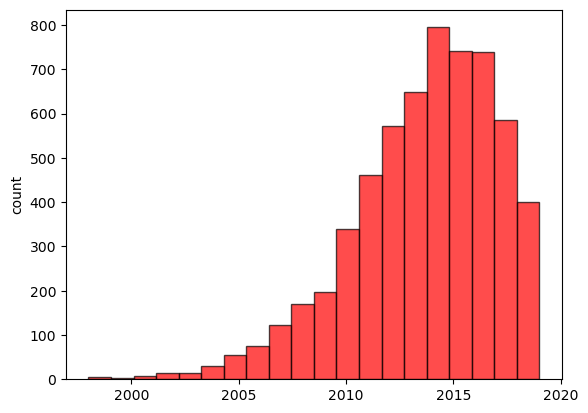

Kilometers_Driven


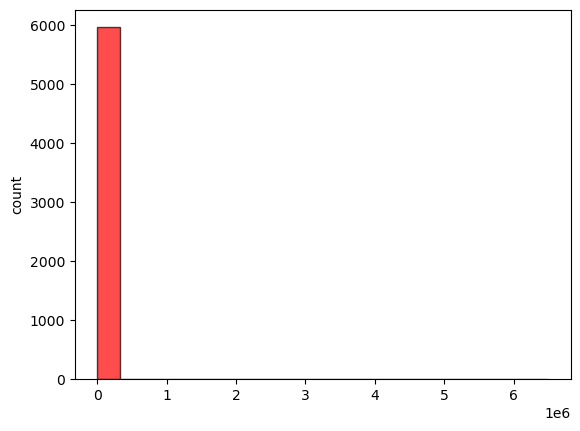

Seats


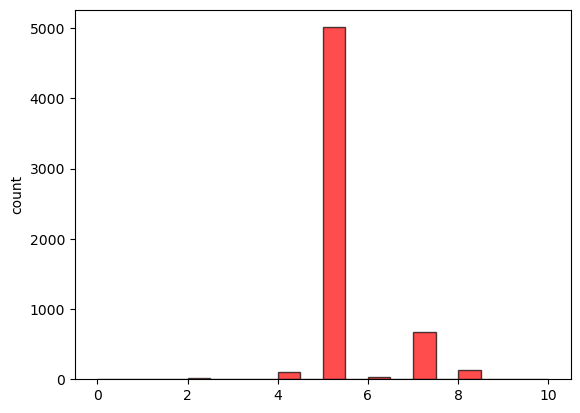

Price


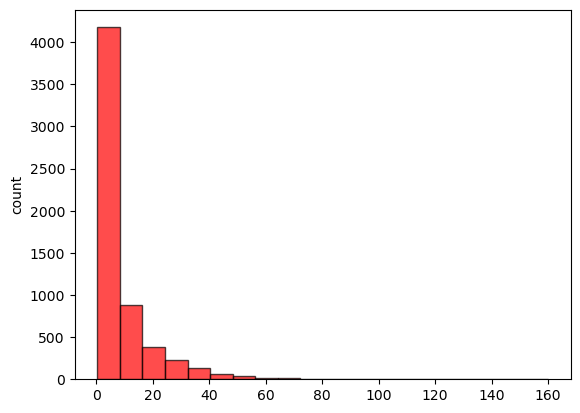

Power (Numeric)


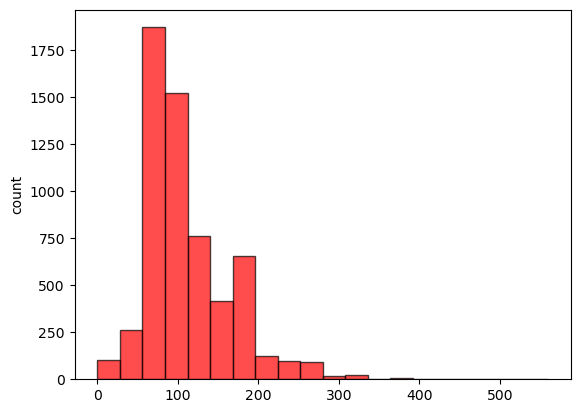

Engine (Numeric)


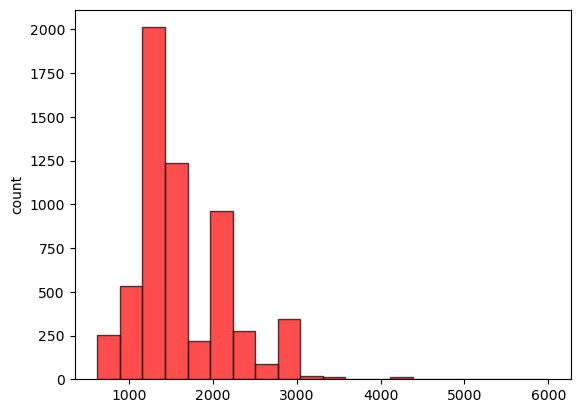

Mileage (Numeric)


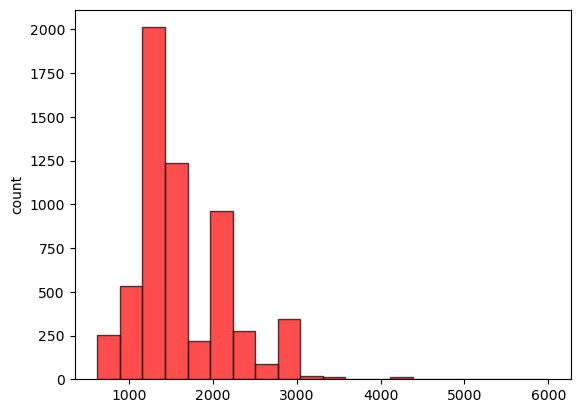

Car_Age


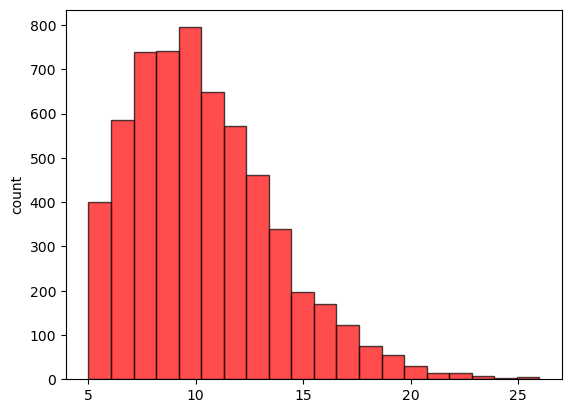

In [30]:
for col in num_col:
    print(col)
    plt.subplot(1,1,1)
    df[col].hist(grid=False,bins = 20,edgecolor = 'black',alpha=0.7,color = 'red')
    plt.ylabel('count')
    plt.show()

In [31]:
cat_col = ['Location','Fuel_Type,Transmission','Owner_Type','Brand','Model']

Year


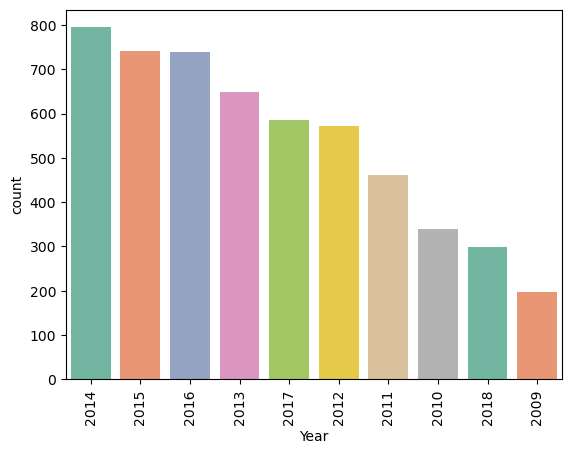

Kilometers_Driven


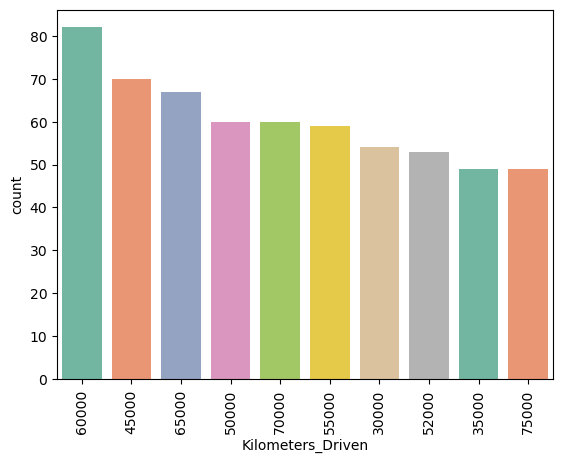

Seats


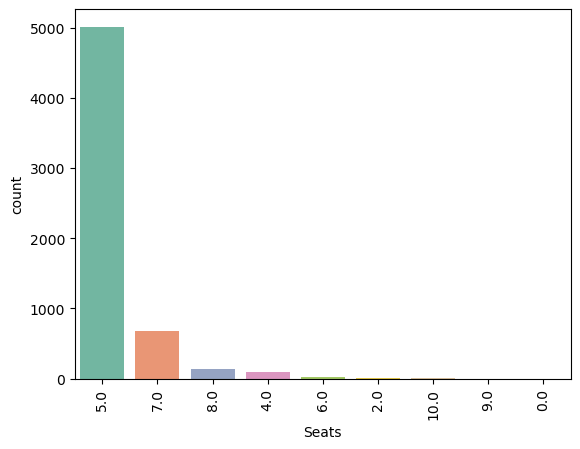

Price


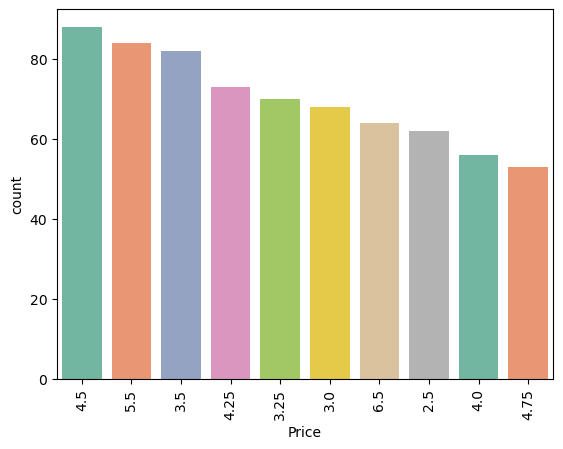

Power (Numeric)


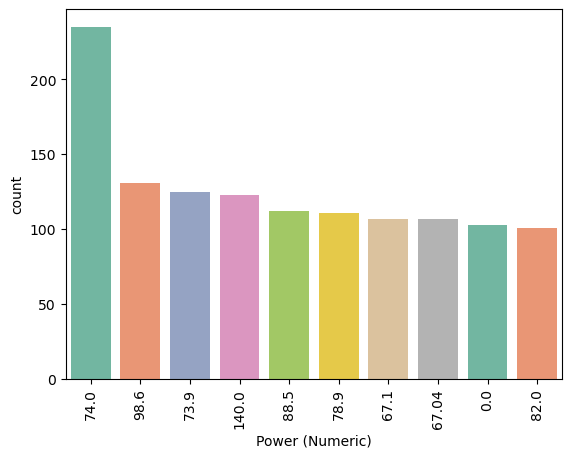

Engine (Numeric)


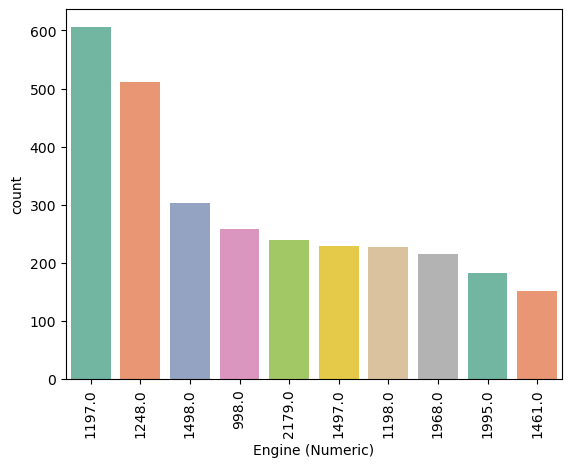

Mileage (Numeric)


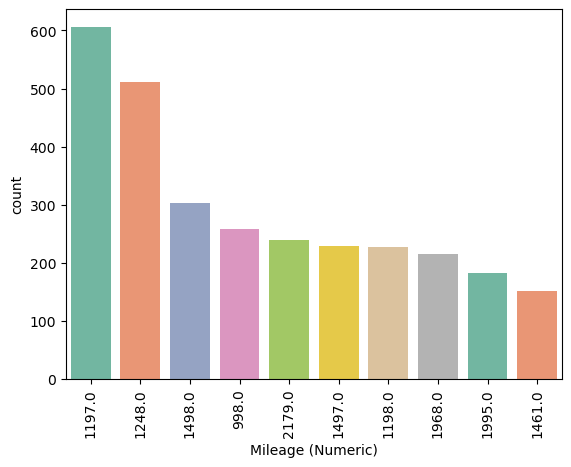

Car_Age


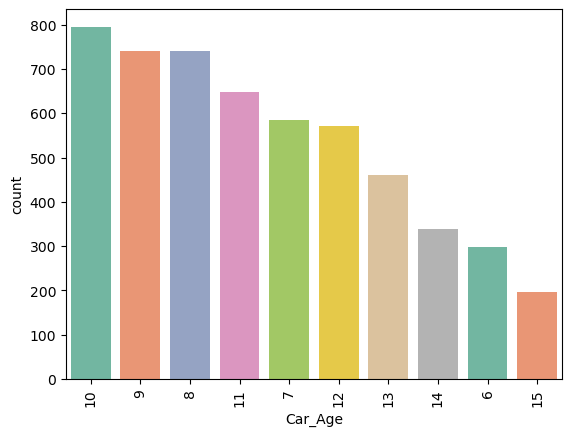

In [32]:
for col in num_col:
    print(col)
    sns.countplot(x=col,data=df,order=df[col].value_counts().head(10).index,palette="Set2")
    plt.xticks(rotation=90)
    plt.show()

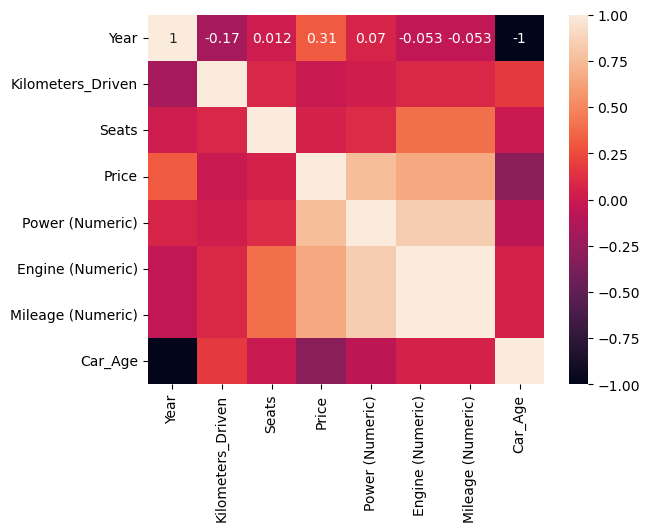

In [33]:
corr = df[num_col].corr()
sns.heatmap(corr, annot = True)
plt.show()

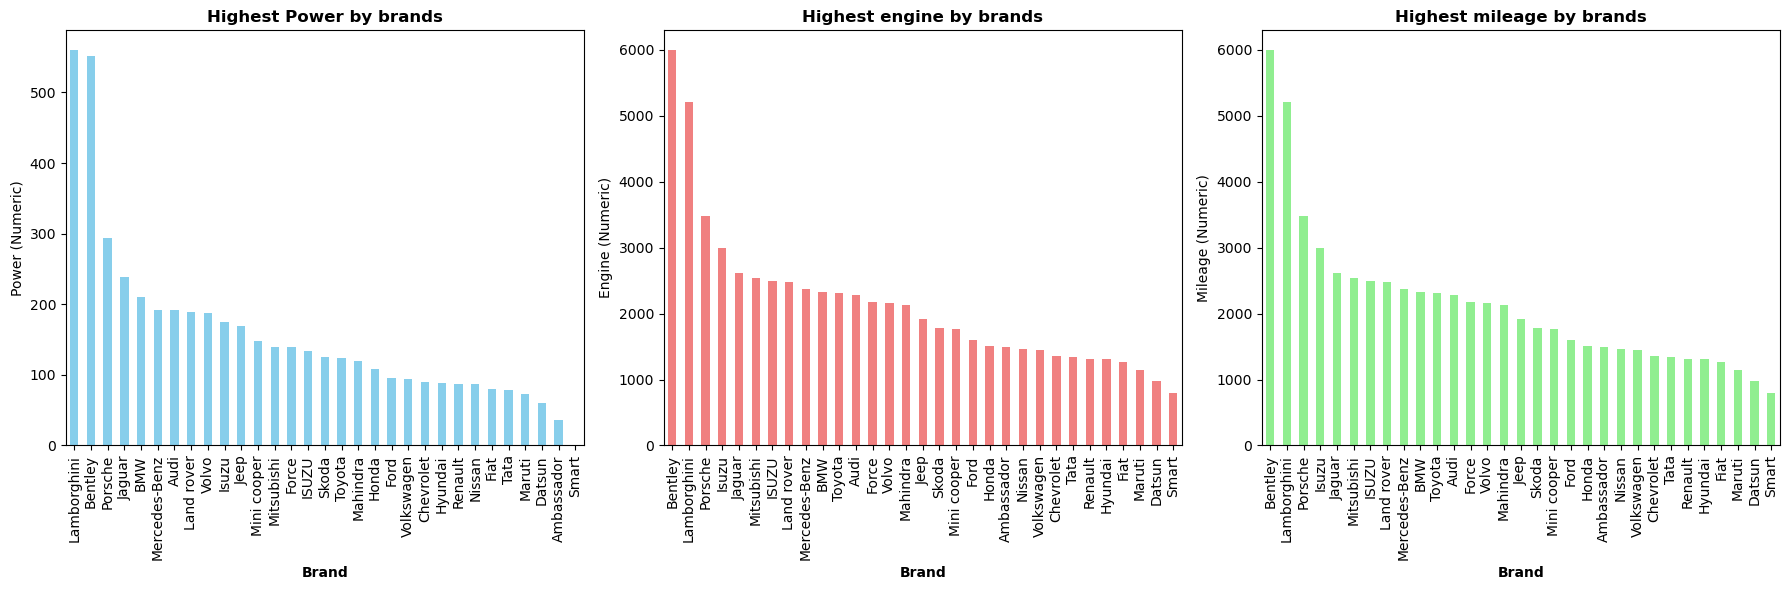

In [34]:
power = df.groupby('Brand')['Power (Numeric)'].mean().sort_values(ascending=False)
engine = df.groupby('Brand')['Engine (Numeric)'].mean().sort_values(ascending=False)
mileage = df.groupby('Brand')['Mileage (Numeric)'].mean().sort_values(ascending=False)

fig , ax = plt.subplots(1,3,figsize =(18,6))

power.plot(kind= 'bar',ax = ax[0],color = 'skyblue')
ax[0].set_title('Highest Power by brands',fontweight = 'bold')
ax[0].set_ylabel('Power (Numeric)')
ax[0].set_xlabel('Brand',fontweight = 'bold')

engine.plot(kind= 'bar',ax = ax[1],color = 'lightcoral')
ax[1].set_title('Highest engine by brands',fontweight = 'bold')
ax[1].set_ylabel('Engine (Numeric)')
ax[1].set_xlabel('Brand',fontweight = 'bold')

mileage.plot(kind= 'bar',ax = ax[2],color = 'lightgreen')
ax[2].set_title('Highest mileage by brands',fontweight = 'bold')
ax[2].set_ylabel('Mileage (Numeric)')
ax[2].set_xlabel('Brand',fontweight = 'bold')

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

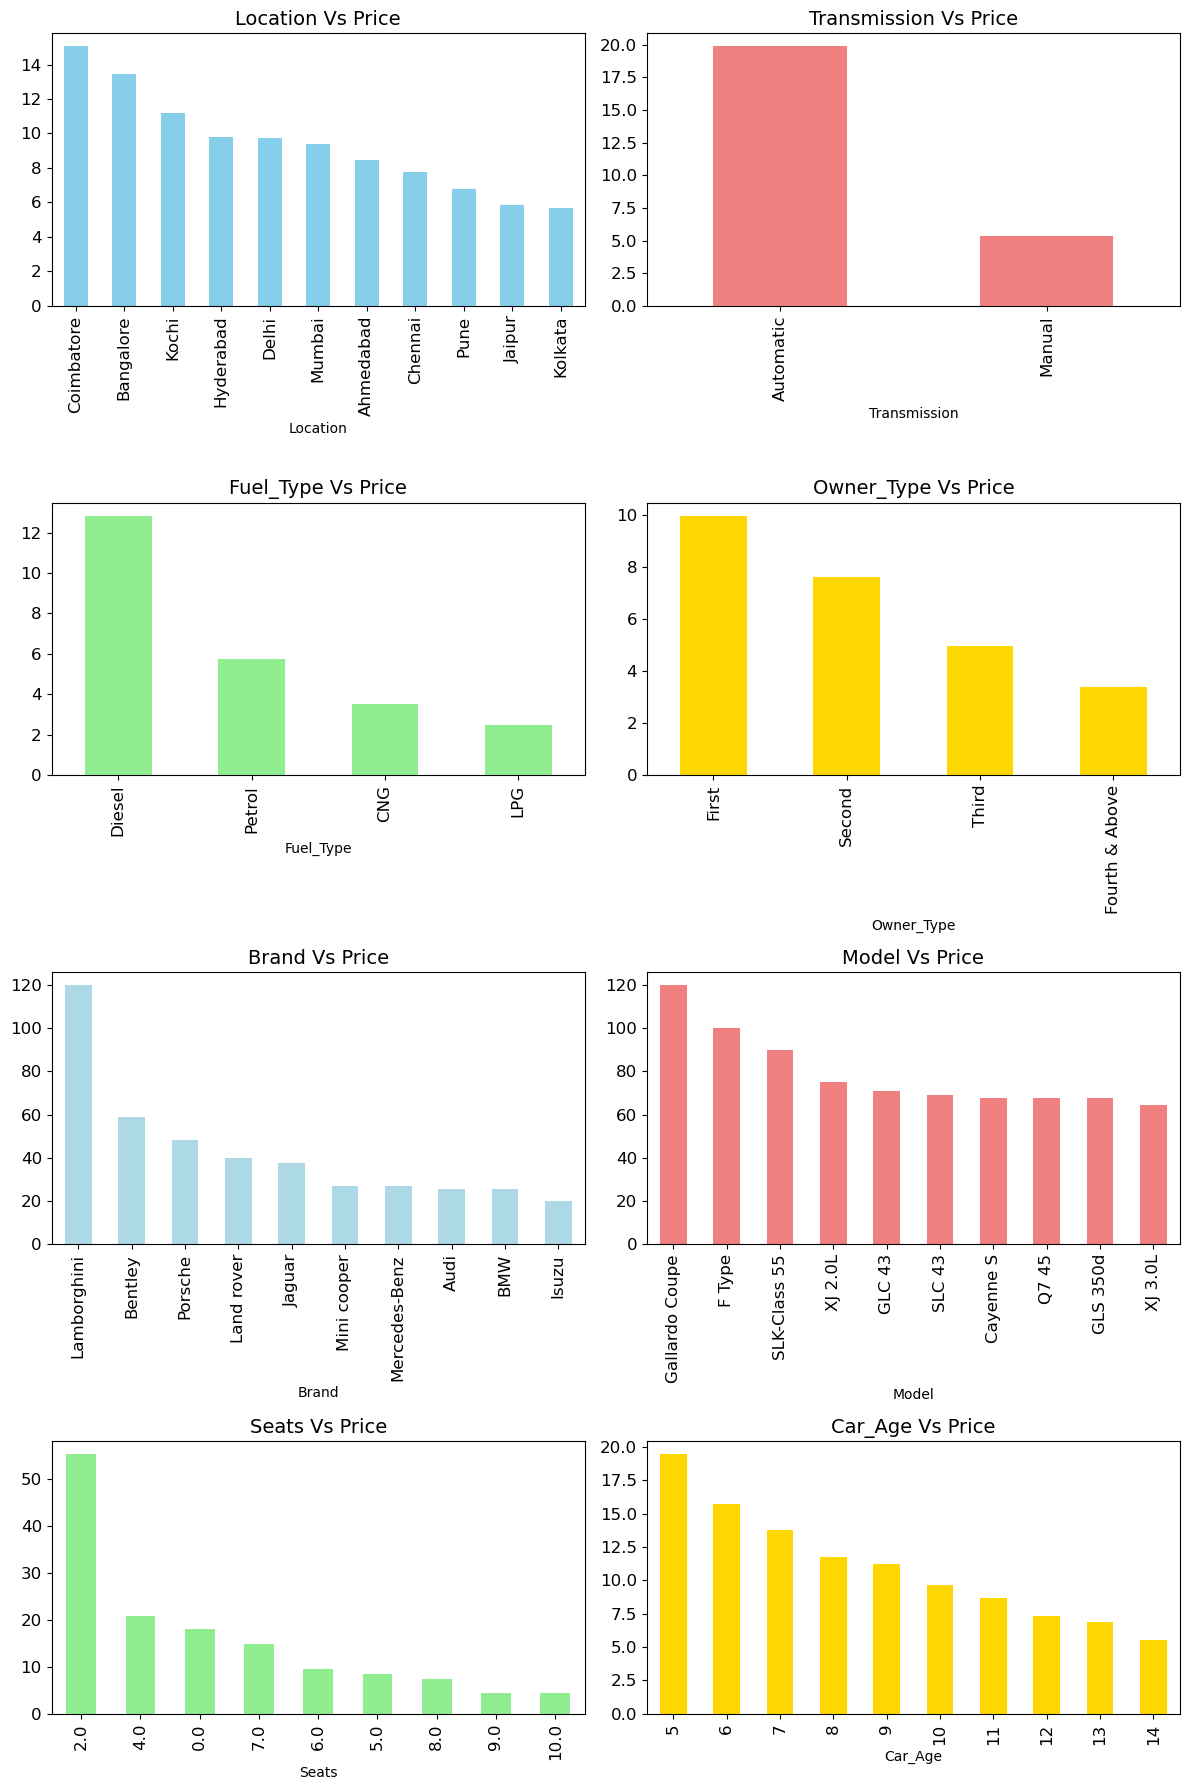

In [35]:
#define features and titles for plotting
features = [
    ('Location','Location Vs Price','skyblue'),
    ('Transmission','Transmission Vs Price','lightcoral'),
    ('Fuel_Type','Fuel_Type Vs Price','lightgreen'),
    ('Owner_Type','Owner_Type Vs Price','gold'),
    ('Brand','Brand Vs Price','lightblue'),
    ('Model','Model Vs Price','lightcoral'),
    ('Seats','Seats Vs Price','lightgreen'),
    ('Car_Age','Car_Age Vs Price','gold'),
]

fig, axarr = plt.subplots(4,2,figsize= (12,18))

for i ,(feature, title, color) in enumerate(features):
    row, col= divmod(i,2)
    if feature in ['Brand','Model','Car_Age']:
        df.groupby(feature)['Price'].mean().sort_values(ascending=False).head(10).plot.bar(
            ax = axarr[row][col], fontsize = 12, color = color
        )
    else:
        df.groupby(feature)['Price'].mean().sort_values(ascending=False).plot.bar(
            ax = axarr[row][col], fontsize = 12, color = color
        )
    axarr[row][col].set_title(title,fontsize=14)

plt.tight_layout()
plt.show